**Quant Research Assignment**

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


data = pd.read_parquet('data.parquet')

data.ffill(inplace=True)

data = data.between_time('09:15', '15:30')

data = data[data.index.weekday < 5]


Our intial assumptions are that the trading only happens between the '09:15', '15:30' and only on weekdays so all our exit and entry times are also this. plus the time that were holding is also considered this long.

To identify options-focused trading opportunities, traders typically use a metric such as Implied Volatility Rank (IV Rank). IV Rank reports the current level of implied volatility in a given underlying stock or ETF against the last 52 weeks of data.

As a result, IV Rank allows investors and traders to quickly filter for opportunities where implied volatility is trading at an extreme. For example, the upper or lower end of the 52-week range. Options traders prefer to trade volatility at extremes because it is historically mean-reverting. 

That means elevated levels of volatility tend to trend lower, back toward the historical average, while depressed levels of volatility tend to trend higher.

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 129720 entries, 2021-01-01 09:15:00 to 2022-06-30 15:30:00
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   banknifty  129720 non-null  float64
 1   nifty      129720 non-null  float64
 2   tte        129720 non-null  int32  
dtypes: float64(2), int32(1)
memory usage: 3.5 MB


In [96]:
data.describe()

,banknifty,nifty,tte
count,129720.000000,129720.000000,129720.000000
mean,0.255155,0.182598,16.292877
std,0.058413,0.046376,8.788409
min,0.152732,0.089355,2.000000
25%,0.209915,0.142772,9.000000
50%,0.250146,0.184492,16.000000
75%,0.295293,0.219186,23.000000
max,0.460619,0.306952,31.000000


In [84]:
data.count()

banknifty    129720
nifty        129720
tte          129720
dtype: int64

In [98]:
data.isnull().count()

banknifty    129720
nifty        129720
tte          129720
dtype: int64

In [99]:
data.corr()

,banknifty,nifty,tte
banknifty,1.000000,0.896280,-0.091766
nifty,0.896280,1.000000,-0.096515
tte,-0.091766,-0.096515,1.000000


In terms of interpreting IV Rank, this metric is typically expressed as a value between 0% and 100%. For example, if implied volatility in Nifty is trading at 50, and the 52-week range in implied volatility is between 25 and 75, that would indicate an IV Rank of 50%.

On the other hand, if implied volatility was trading at 25 in Nifty, then IV Rank would be 0%, because 25 represents the lowest level of implied volatility observed over the last 52 weeks. Alternatively, if implied volatility was trading at 75, that would represent an IV Rank of 100%, because 75 represents the highest level of implied volatility observed over the last 52 weeks.

Similarly, for Bank Nifty, if the current implied volatility is at 40 and the 52-week range is from 20 to 60, the IV Rank would be calculated as 50%, indicating that the current volatility is exactly in the middle of its yearly range.

When IV Rank is above 50%, options traders typically look for opportunities to sell volatility, especially when the overall market volatility, as represented by indices like the VIX, is elevated. The long-term average in the VIX is roughly 19.

So, when the VIX starts trending into the 20s and 30s, options traders usually become more active in selling derivatives. It should be noted that significant market events could cause spikes in the VIX, such as it trading above 40, which hasn't happened since April 2020.

On the flip side, when IV Ranks are low, volatility-focused traders tend to look for buying opportunities. This could be the case when the VIX is trading at around 13, indicating a lower end of its recent range, reflecting a potentially favorable environment for buying options in Nifty and Bank Nifty.

However, options traders must always consider the impact of time decay. As options approach their expiration date, they tend to lose value due to this time decay, presenting a natural challenge for options buyers in both Nifty and Bank Nifty.

/Users/yasheshpandita/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/yasheshpandita/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/yasheshpandita/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


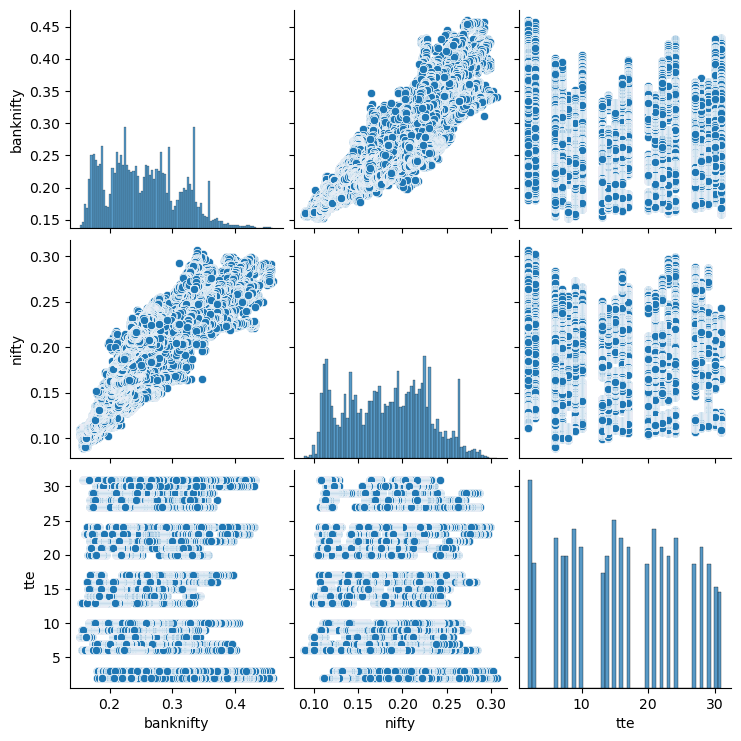

In [80]:
import seaborn as sns 
sns.pairplot(data)

In [100]:
data.isna().sum()

banknifty    0
nifty        0
tte          0
dtype: int64

In [101]:
np.isinf(data).sum()

banknifty    0
nifty        0
tte          0
dtype: int64

To conduct a cointegration test between the Nifty and Bank Nifty indices, we employ the Engle-Granger two-step method, facilitated by the coint function from the statsmodels library in Python. The test outputs a test statistic and a corresponding p-value. The test statistic quantifies the evidence against the null hypothesis, which in the context of cointegration tests, typically states that there is no cointegration between the time series. The p-value indicates the probability of observing a test statistic as extreme as the one observed under the null hypothesis.

A low p-value (commonly below the conventional threshold of 0.05) allows us to reject the null hypothesis, concluding that there is a statistically significant cointegration between the Nifty and Bank Nifty indices. This implies that despite short-term fluctuations, the indices share a long-term equilibrium relationship, making them suitable candidates for pairs trading strategies. In such strategies, traders can exploit temporary deviations from this equilibrium, betting on the convergence of the indices' spread back to its mean.

It's important to note that while cointegration suggests a stable long-term relationship, it does not imply causality or predict the future movements of the indices. Instead, it provides a statistical foundation for pairs trading strategies, where the focus is on the mean-reverting nature of the spread between cointegrated pairs.

In [196]:
from statsmodels.tsa.stattools import coint

score, p_value, _ = coint(data['nifty'], data['banknifty'])

print(f'Cointegration test score: {score}')
print(f'P-value: {p_value}')

Cointegration test score: -4.842377009432944
P-value: 0.00031749013263718777


In [148]:
data['spread'] = data['banknifty'] - data['nifty']

<Figure size 1500x800 with 0 Axes>

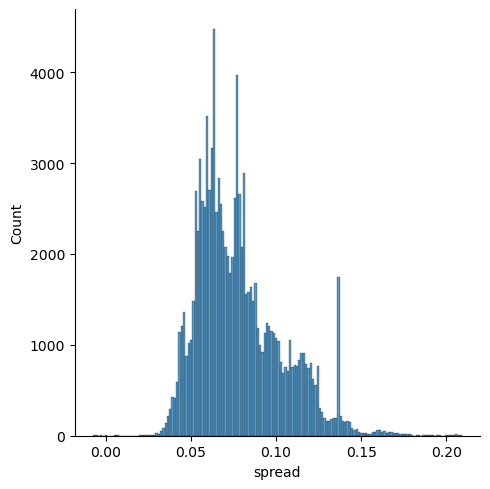

In [149]:
plt.figure(figsize=(15,8))
sns.displot(data['spread'])

<Figure size 1500x800 with 0 Axes>

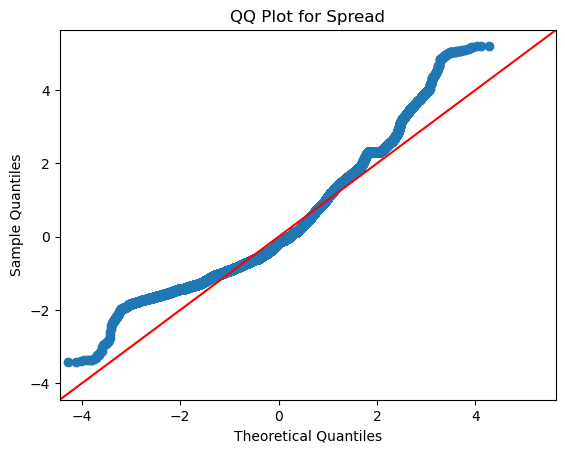

In [190]:
import statsmodels.api as sm
plt.figure(figsize=(15, 8))
sm.qqplot(data['spread'], line ='45', fit=True)
plt.title('QQ Plot for Spread')
plt.show()


<Axes: xlabel='time', ylabel='banknifty'>

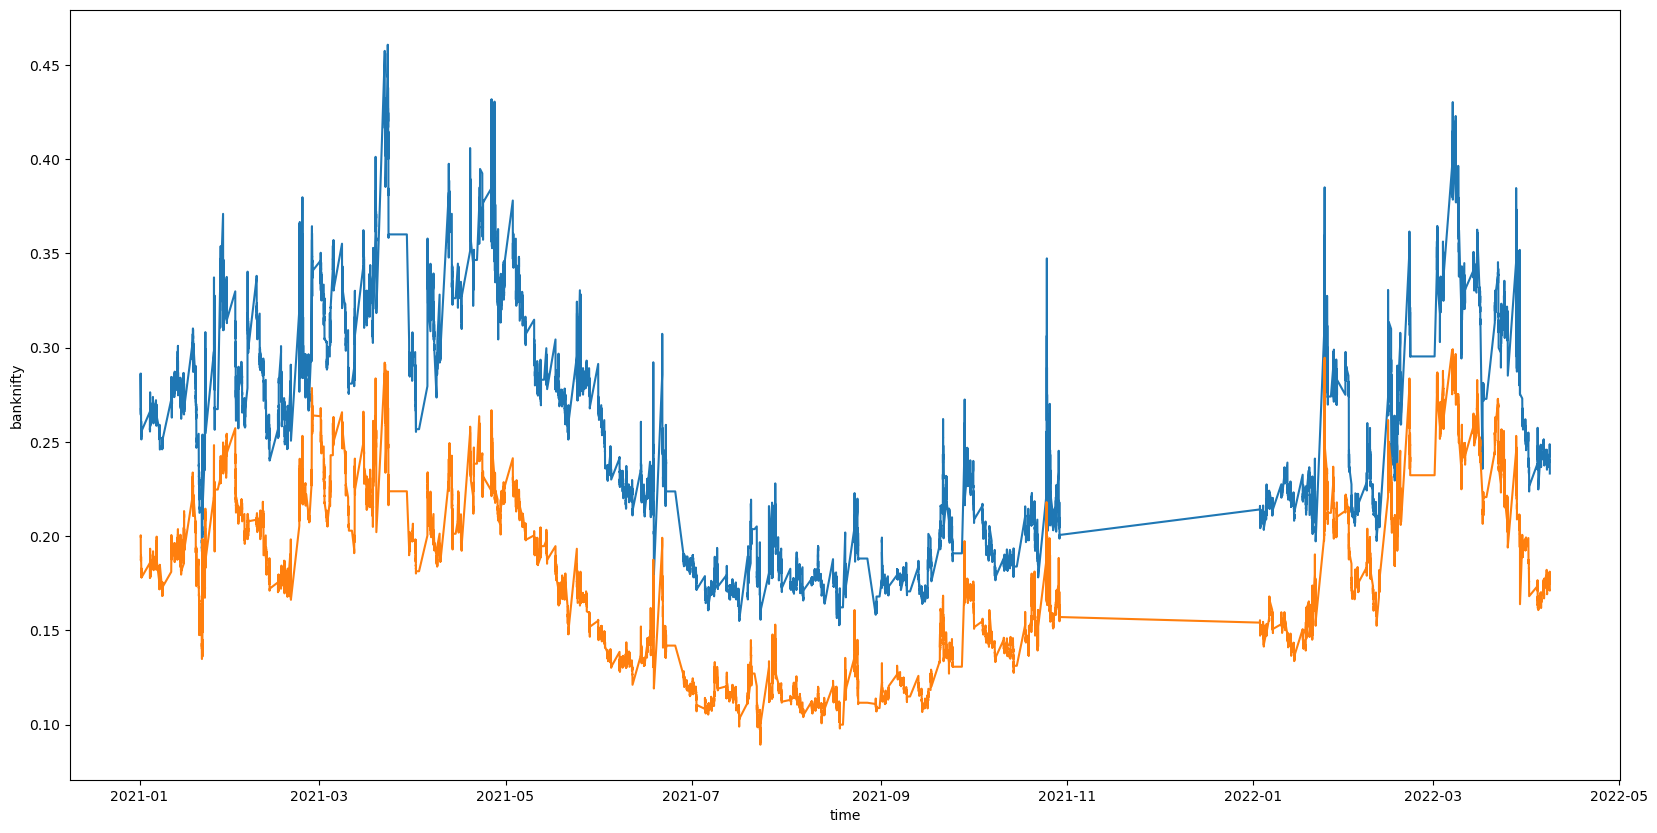

In [150]:
plt.figure(figsize=(20,10))
sns.lineplot(data['banknifty'])
sns.lineplot(data['nifty'])

In [144]:
data['mean_iv_spread'] = data['spread'].mean()
data['std_iv_spread'] = data['spread'].std()
data['z_score'] = (data['spread'] - data['mean_iv_spread']) / data['std_iv_spread']

data.bfill(inplace=True)

z_entry_threshold = 1.8
z_exit_threshold = -1

trade_records = []

for index, row in data.iterrows():
    if row['z_score'] > z_entry_threshold or row['z_score'] < -z_entry_threshold:
        entry_time = index
        entry_spread = row['spread']
        tte = row['tte']
        
        trading_start = '09:15'
        trading_end = '15:30'
        
        def generate_trading_hours_for_day(day):
            start_datetime = pd.Timestamp(f'{day.date()} {trading_start}')
            end_datetime = pd.Timestamp(f'{day.date()} {trading_end}')
            return pd.date_range(start=start_datetime, end=end_datetime, freq='T')
            
        potential_exit_times = pd.DatetimeIndex([])
        current_day = entry_time.normalize() 
        
        for _ in range(5): 
          
            if current_day.weekday() < 5:
                trading_hours_for_day = generate_trading_hours_for_day(current_day)
                potential_exit_times = potential_exit_times.union(trading_hours_for_day)
       
            current_day += pd.Timedelta(days=1)
        
        valid_exit_times = potential_exit_times.intersection(data.index)
        valid_exit_times = valid_exit_times[valid_exit_times > entry_time]  # Ensure exit time is after entry time

        if not valid_exit_times.empty:
            exit_time = valid_exit_times[0]
        else:
            continue
        
        exit_signal = data.loc[valid_exit_times]
        exit_signal = exit_signal[(exit_signal['z_score'] < z_exit_threshold) & (exit_signal['z_score'] > -z_exit_threshold)]
        
        if not exit_signal.empty:
            exit_time = exit_signal.index[0]
        else:
            exit_time = valid_exit_times[-1] if not valid_exit_times.empty else entry_time
        
        exit_spread = data.at[exit_time, 'spread'] if exit_time in data.index else entry_spread  # Use entry spread if exit_time not in index
        

        pl = (entry_spread-exit_spread) * (tte ** 0.7)

        trade_records.append({
            'entry_time': entry_time,
            'exit_time': exit_time,
            'entry_spread': entry_spread,
            'exit_spread': exit_spread,
            'time_to_expiry': tte,
            'pl': pl
        })


trades_df = pd.DataFrame(trade_records)

total_pl = trades_df['pl'].sum()
print(f"Total P/L: {total_pl}")


Total P/L: 733.6498269334706


The code above is an algorithm for a trading strategy based on the z-score of a spread (which might represent the price difference between two assets, for instance). The strategy enters a trade when the z-score of the spread exceeds a certain threshold (either above 1.8 or below -1.8) and looks for exit opportunities either when the z-score comes back to a more neutral range (between -1 and 1) or at the end of a specified time period. It calculates the profit and loss (P/L) based on the change in the spread adjusted by a function of time to expiry (TTE), raised to the power of 0.7. This is the case when the mean for whole dataset in chosen as complete mean of the time series.

The steps of the algorithm are as follows:

1. Calculate the mean (`mean_iv_spread`) and standard deviation (`std_iv_spread`) of the spread.
2. Calculate the z-score for the spread.
3. Use backward fill (`bfill`) to fill any missing values in the dataset.
4. Define thresholds for entering (`z_entry_threshold`) and exiting (`z_exit_threshold`) trades.
5. Initialize an empty list (`trade_records`) to store trade details.
6. Iterate over each row of the data:
   - Check if the z-score exceeds the entry threshold.
   - Determine the entry time and spread, as well as the time to expiry (`tte`).
   - Calculate potential exit times within the next 5 days during trading hours (9:15 to 15:30) excluding weekends.
   - Find valid exit times that are present in the data and occur after the entry time.
   - If an exit signal is found within the valid exit times based on the z-score returning to a neutral range, or if no such signal is found, use the last valid exit time.
   - Calculate the P/L based on the difference in the spread at entry and exit, adjusted by a function of `tte`.
7. Store the details of each trade in `trade_records`.
8. Convert `trade_records` into a DataFrame (`trades_df`) and calculate the total P/L.

This strategy seems to be a statistical arbitrage approach, leveraging mean reversion in the spread of two or more assets. It's important to note a few considerations for practical implementation:

- **Transaction Costs**: The strategy does not account for transaction costs, which can significantly impact profitability, especially in high-frequency trading settings.
- **Slippage**: The model assumes execution at the exact spread values calculated, which might not be possible in live trading due to slippage.
- **Market Impact**: For large orders, the act of trading itself can affect the market price, leading to potential deviations from the modeled P/L.
- **Model Assumptions**: The effectiveness of the strategy relies heavily on the assumption that the spread will revert to its mean, which may not always hold true under market stress or regime changes.


<Figure size 1500x800 with 0 Axes>

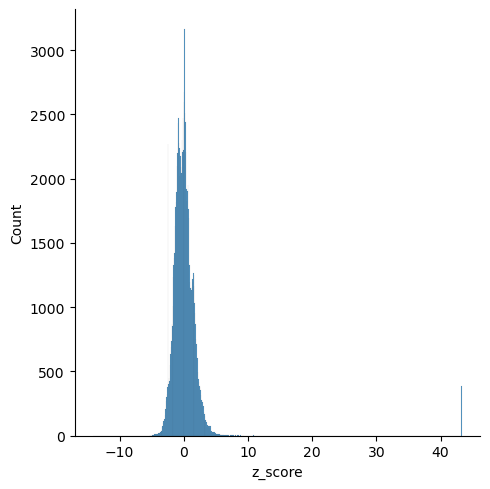

In [153]:
plt.figure(figsize=(15,8))
sns.displot(data['z_score'])

In [145]:
trades_df['abs_pl'] = trades_df['pl'].abs()
total_abs_pl = trades_df['abs_pl'].sum()
print(f"Total Absolute P/L: {total_abs_pl}")


Total Absolute P/L: 844.0523424952428


In [154]:
data[data['spread']<0]

,banknifty,nifty,tte,spread,mean_iv_spread,std_iv_spread,z_score,rolling_mean_iv_spread,rolling_std_iv_spread,spread_lag_1,spread_lag_2,spread_lag_3,spread_lag_4,spread_lag_5,rolling_mean,rolling_std,future_spread,pl_ratio,label
time,,,,,,,,,,,,,,,,,,,
2021-10-25 09:18:00,0.204981,0.211100,3,-0.006120,0.078316,0.024939,-5.707008,0.049568,0.009758,0.056572,0.049995,0.034555,0.026024,0.030858,0.049568,0.009758,0.042880,0.105725,1
2021-10-25 09:34:00,0.201500,0.206165,3,-0.004664,0.078316,0.024939,-5.262876,0.049276,0.010249,0.004007,0.002801,0.035529,0.004180,0.005190,0.049276,0.010249,0.062326,0.144543,1
2021-10-25 09:35:00,0.200684,0.206369,3,-0.005685,0.078316,0.024939,-5.318875,0.049245,0.010327,-0.004664,0.004007,0.002801,0.035529,0.004180,0.049245,0.010327,0.061263,0.144451,1
2021-10-25 09:36:00,0.201333,0.206978,3,-0.005645,0.078316,0.024939,-5.272611,0.049214,0.010405,-0.005685,-0.004664,0.004007,0.002801,0.035529,0.049214,0.010405,0.061590,0.145071,1
2021-10-25 09:37:00,0.201489,0.205798,3,-0.004309,0.078316,0.024939,-5.105511,0.049184,0.010478,-0.005645,-0.005685,-0.004664,0.004007,0.002801,0.049184,0.010478,0.061558,0.142118,1
2021-10-25 09:38:00,0.201760,0.202396,3,-0.000636,0.078316,0.024939,-4.723945,0.049156,0.010540,-0.004309,-0.005645,-0.005685,-0.004664,0.004007,0.049156,0.010540,0.061845,0.134813,1
2021-10-25 09:39:00,0.202600,0.203084,3,-0.000483,0.078316,0.024939,-4.679391,0.049127,0.010602,-0.000636,-0.004309,-0.005645,-0.005685,-0.004664,0.049127,0.010602,0.061006,0.132674,1
2021-10-25 09:40:00,0.201771,0.203985,3,-0.002213,0.078316,0.024939,-4.809910,0.049098,0.010668,-0.000483,-0.000636,-0.004309,-0.005645,-0.005685,0.049098,0.010668,0.058816,0.131681,1
2021-10-25 09:41:00,0.198317,0.204326,3,-0.006009,0.078316,0.024939,-5.126631,0.049067,0.010743,-0.002213,-0.000483,-0.000636,-0.004309,-0.005645,0.049067,0.010743,0.059105,0.140493,1


In [107]:
potential_exit_times.shape

(1128,)

In [108]:
valid_exit_times.shape

(3,)

In [146]:
data['rolling_mean_iv_spread'] = data['spread'].rolling(window=375 * 5).mean()
data['rolling_std_iv_spread'] = data['spread'].rolling(window=375 * 5).std()
data['z_score'] = (data['spread'] - data['rolling_mean_iv_spread']) / data['rolling_std_iv_spread']

data.bfill(inplace=True)

z_entry_threshold = 1.8
z_exit_threshold = -1

trade_records = []


for index, row in data.iterrows():
    if row['z_score'] > z_entry_threshold or row['z_score'] < -z_entry_threshold:
        
        entry_time = index
        entry_spread = row['spread']
        tte = row['tte'] 
        
        trading_start = '09:15'
        trading_end = '15:30'
       
        def generate_trading_hours_for_day(day):
            start_datetime = pd.Timestamp(f'{day.date()} {trading_start}')
            end_datetime = pd.Timestamp(f'{day.date()} {trading_end}')
            return pd.date_range(start=start_datetime, end=end_datetime, freq='T')
        
        potential_exit_times = pd.DatetimeIndex([])
        current_day = entry_time.normalize() 
        
        for _ in range(5):  
            if current_day.weekday() < 5:
                trading_hours_for_day = generate_trading_hours_for_day(current_day)
                potential_exit_times = potential_exit_times.union(trading_hours_for_day)
            current_day += pd.Timedelta(days=1)
        
        valid_exit_times = potential_exit_times.intersection(data.index)
        valid_exit_times = valid_exit_times[valid_exit_times > entry_time]  

        if not valid_exit_times.empty:
            exit_time = valid_exit_times[0]
        else:
            continue
        
        exit_signal = data.loc[valid_exit_times]
        exit_signal = exit_signal[(exit_signal['z_score'] < z_exit_threshold) & (exit_signal['z_score'] > -z_exit_threshold)]
        
        if not exit_signal.empty:
            exit_time = exit_signal.index[0]
        else:
            exit_time = valid_exit_times[-1] if not valid_exit_times.empty else entry_time
        
        exit_spread = data.at[exit_time, 'spread'] if exit_time in data.index else entry_spread  # Use entry spread if exit_time not in index
  
        pl = (entry_spread-exit_spread) * (tte ** 0.7)
        
        
        trade_records.append({
            'entry_time': entry_time,
            'exit_time': exit_time,
            'entry_spread': entry_spread,
            'exit_spread': exit_spread,
            'time_to_expiry': tte,
            'pl': pl
        })

trades_df = pd.DataFrame(trade_records)


total_pl = trades_df['pl'].sum()
print(f"Total P/L: {total_pl}")


Total P/L: 1035.9366763551811


In [147]:
trades_df['abs_pl'] = trades_df['pl'].abs()
total_abs_pl = trades_df['abs_pl'].sum()
print(f"Total Absolute P/L: {total_abs_pl}")


Total Absolute P/L: 1827.998570857033


In [155]:
trades_df[trades_df['pl']<0].shape

(8070, 7)

In [156]:
potential_exit_times.shape

(1128,)

In [157]:
valid_exit_times.shape

(1066,)

In [158]:
trades_df

,entry_time,exit_time,entry_spread,exit_spread,time_to_expiry,pl,abs_pl
0,2021-01-01 09:15:00,2021-01-05 15:30:00,0.086329,0.080856,27.0,0.054977,0.054977
1,2021-01-01 09:16:00,2021-01-05 15:30:00,0.084948,0.080856,27.0,0.041110,0.041110
2,2021-01-01 09:17:00,2021-01-05 15:30:00,0.084229,0.080856,27.0,0.033882,0.033882
3,2021-01-01 09:18:00,2021-01-05 15:30:00,0.086244,0.080856,27.0,0.054118,0.054118
4,2021-01-01 09:19:00,2021-01-05 15:30:00,0.086588,0.080856,27.0,0.057579,0.057579
...,...,...,...,...,...,...,...
20336,2022-03-29 13:35:00,2022-04-01 15:30:00,0.149915,0.058203,2.0,0.148987,0.148987
20337,2022-03-29 13:38:00,2022-04-01 15:30:00,0.151382,0.058203,2.0,0.151369,0.151369
20338,2022-03-29 14:05:00,2022-04-01 15:30:00,0.143666,0.058203,30.0,0.924194,0.924194
20339,2022-03-29 15:00:00,2022-04-01 15:30:00,0.134419,0.058203,30.0,0.824192,0.824192


Now i have tried to build a better model by using a RandomForestClassifier, a machine learning model from the scikit-learn library, to predict the direction of the spread (presumably of a financial instrument or the difference between two financial instruments) based on historical data. The objective is to classify whether the spread will increase (labeled as 1) or decrease/not change (labeled as 0) after a specified holding period. 
Here's a step-by-step explanation:

1. **Feature Engineering**:
    - **Lagged Features**: For each lag from 1 to 5, the code creates new columns (`spread_lag_{lag}`) in the dataset. Each column represents the spread value `lag` periods ago. This is done to incorporate past values of the spread as features, under the assumption that past values may have predictive power for future spread direction.
    - **Rolling Mean and Standard Deviation**: The code calculates rolling mean (`rolling_mean`) and standard deviation (`rolling_std`) over a window of `375*5` periods. These features are intended to capture the longer-term trend and volatility of the spread.
    - The `bfill` method is used to fill any missing values resulting from the lag and rolling calculations, ensuring that there are no NaNs in the feature set.

2. **Target and Holding Period**:
    - A new column, `future_spread`, is created to represent the value of the spread after a specified holding period (`375*5` periods ahead).
    - The `pl_ratio` (profit/loss ratio) is calculated as the difference between the future spread and the current spread, adjusted by a power function of the time to expiry (`tte`), raised to the power of 0.7. This adjustment is likely made to account for the diminishing sensitivity of the spread to its underlying factors as the expiry approaches.
    - The last `375*5` rows are removed from the dataset to avoid NaNs in the `future_spread` column, which occur because there's no future data for the last `375*5` periods in the dataset.
    - The target variable `label` is then created by converting the sign of `pl_ratio` into binary format, where 1 indicates a positive `pl_ratio` (profitable scenario) and 0 indicates a non-positive `pl_ratio` (unprofitable or neutral scenario).

3. **Preparing the Data for Modeling**:
    - The feature set `X` is created by dropping columns that either directly relate to the target variable or are not relevant for prediction (like `banknifty`, `nifty`, `future_spread`, `tte`, `pl_ratio`, and `label`).
    - The target variable `y` is set to the `label` column.
    - The dataset is split into training and testing sets using a 70-30 split. The `shuffle=False` parameter ensures that the split is sequential, maintaining the time series order, which is crucial for time series forecasting to avoid lookahead bias.

4. **Model Training and Evaluation**:
    - A RandomForestClassifier is instantiated with 100 decision trees (`n_estimators=100`) and a fixed random state for reproducibility (`random_state=42`).
    - The model is trained on the training set (`X_train`, `y_train`).
    - Predictions are made on the test set (`X_test`), and the accuracy of these predictions is evaluated against the actual labels (`y_test`). Accuracy is the proportion of correct predictions over all predictions, a common metric for classification tasks.

Hence we aim to build a machine learning model to predict the direction of the spread's change after a predefined holding period, using historical spread values and derived statistical features. The performance of the model is assessed based on its accuracy in classifying the direction of change correctly on the test set.

In [159]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

for lag in range(1, 6): 
    data[f'spread_lag_{lag}'] = data['spread'].shift(lag)

data['rolling_mean'] = data['spread'].rolling(window=375*5).mean()
data['rolling_std'] = data['spread'].rolling(window=375*5).std()  


data.bfill(inplace=True)


holding_period = 375 * 5 
data['future_spread'] = data['spread'].shift(-holding_period) 
data['pl_ratio'] = (data['future_spread'] - data['spread'])*(data['tte']**0.7)


data = data[:-holding_period]

data['label'] = (data['pl_ratio'] > 0).astype(int)

X = data.drop(['banknifty', 'nifty', 'future_spread','tte', 'pl_ratio', 'label'], axis=1)
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)


rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


rf_model.fit(X_train, y_train)


predictions = rf_model.predict(X_test)


accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')


Accuracy: 0.6076762435134793


In [186]:
predictions_df = pd.DataFrame(predictions, index=X_test.index, columns=['predictions'])

test_data_with_predictions = data[['spread', 'future_spread','tte']].merge(predictions_df, left_index=True, right_index=True)

test_data_with_predictions['pl_ratio'] = np.where(test_data_with_predictions['predictions'] == 1, 
                                                  (test_data_with_predictions['future_spread'] - test_data_with_predictions['spread'])*(test_data_with_predictions['tte']**0.7), 
                                                  0)
total_pl = test_data_with_predictions['pl_ratio'].sum()
print(f"Total P/L from model predictions: {total_pl}")



Total P/L from model predictions: 428.1314377520981


In [187]:
mean_returns = test_data_with_predictions['pl_ratio'].mean()
std_returns = test_data_with_predictions['pl_ratio'].std()

risk_free_rate = 0

if std_returns != 0:
    sharpe_ratio = (mean_returns - risk_free_rate) / std_returns
else:
    sharpe_ratio = None

print(f"Total P/L from model predictions: {total_pl}")
print(f"Sharpe Ratio: {sharpe_ratio}")


Total P/L from model predictions: 428.1314377520981
Sharpe Ratio: 0.162371518644427


In [169]:
X_test = data[['tte']].merge(X_test,left_index=True,right_index=True)

To comapre the model with z-score i have applied the z-score only on the X_test dataset to check whether i have a better P/L ratio and Sharpe Ratio not and whether my model is working or not.

In [184]:
X_test['rolling_mean_iv_spread'] = X_test['spread'].rolling(window=375 * 5).mean()
X_test['rolling_std_iv_spread'] = X_test['spread'].rolling(window=375 * 5).std()
X_test['z_score'] = (X_test['spread'] - X_test['rolling_mean_iv_spread']) / data['rolling_std_iv_spread']

data.bfill(inplace=True)

z_entry_threshold = 1.8
z_exit_threshold = -1

trade_records = []


for index, row in X_test.iterrows():
    if row['z_score'] > z_entry_threshold or row['z_score'] < -z_entry_threshold:
        
        entry_time = index
        entry_spread = row['spread']
        tte = row['tte'] 
        
        
        trading_start = '09:15'
        trading_end = '15:30'
       
        def generate_trading_hours_for_day(day):
            start_datetime = pd.Timestamp(f'{day.date()} {trading_start}')
            end_datetime = pd.Timestamp(f'{day.date()} {trading_end}')
            return pd.date_range(start=start_datetime, end=end_datetime, freq='T')
        
        potential_exit_times = pd.DatetimeIndex([])
        current_day = entry_time.normalize() 
        
        for _ in range(5):  
            if current_day.weekday() < 5:
                trading_hours_for_day = generate_trading_hours_for_day(current_day)
                potential_exit_times = potential_exit_times.union(trading_hours_for_day)
            current_day += pd.Timedelta(days=1)
        
        valid_exit_times = potential_exit_times.intersection(data.index)
        valid_exit_times = valid_exit_times[valid_exit_times > entry_time]  

        if not valid_exit_times.empty:
            exit_time = valid_exit_times[0]
        else:
            continue
        
        exit_signal = X_test.loc[valid_exit_times]
        exit_signal = exit_signal[(exit_signal['z_score'] < z_exit_threshold) & (exit_signal['z_score'] > -z_exit_threshold)]
        
        if not exit_signal.empty:
            exit_time = exit_signal.index[0]
        else:
            exit_time = valid_exit_times[-1] if not valid_exit_times.empty else entry_time
        
        exit_spread = data.at[exit_time, 'spread'] if exit_time in data.index else entry_spread
  
        pl = (entry_spread-exit_spread)*(tte**0.7)
        
        
        trade_records.append({
            'entry_time': entry_time,
            'exit_time': exit_time,
            'entry_spread': entry_spread,
            'exit_spread': exit_spread,
            'time_to_expiry': tte,
            'pl': pl
        })

trades_df = pd.DataFrame(trade_records)


total_pl = trades_df['pl'].sum()
print(f"Total P/L: {total_pl}")


Total P/L: 400.5765473080637


In [185]:
trades_df['return'] = trades_df['pl'] / trades_df['entry_spread']

average_return = trades_df['return'].mean()
std_dev_return = trades_df['return'].std()

risk_free_rate = 0 

sharpe_ratio = (average_return - risk_free_rate) / std_dev_return if std_dev_return != 0 else None

print(f"Total P/L: {total_pl}")
print(f"Sharpe Ratio: {sharpe_ratio}")


Total P/L: 400.5765473080637
Sharpe Ratio: 0.08024315237975499


Hence, I have compared a z-score based trading stratergy with a machine learning logistic regression. The results are as follow:
For **Logistic Regression** based on X_test :
**Total P/L**: 428.1314377520981
**Sharpe Ratio**: 0.162371518644427

For **Z-Score**:
**Total P/L**: 400.5765473080637
**Sharpe Ratio**: 0.08024315237975499